In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Dataset/Best Songs on Spotify from 2000-2023.csv',sep=';')
data.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [3]:
data.shape

(2385, 14)

In [4]:
data.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'energy',
       'danceability ', 'dB', 'liveness', 'valence', 'duration',
       'acousticness', 'speechiness ', 'popularity'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2385 non-null   object
 1   artist         2385 non-null   object
 2   top genre      2385 non-null   object
 3   year           2385 non-null   int64 
 4   bpm            2385 non-null   int64 
 5   energy         2385 non-null   int64 
 6   danceability   2385 non-null   int64 
 7   dB             2385 non-null   int64 
 8   liveness       2385 non-null   int64 
 9   valence        2385 non-null   int64 
 10  duration       2385 non-null   int64 
 11  acousticness   2385 non-null   int64 
 12  speechiness    2385 non-null   int64 
 13  popularity     2385 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 261.0+ KB


In [6]:
data.describe()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
count,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000,2385.000000
mean,2011.116981,119.783648,69.792453,67.034801,-5.771488,17.787002,54.233962,225.946751,15.612998,10.112369,70.526625
std,6.748364,27.273075,16.164609,13.719049,2.072153,13.629287,22.458084,43.226704,20.277746,9.520815,11.419740
min,1985.000000,60.000000,6.000000,18.000000,-18.000000,2.000000,4.000000,115.000000,0.000000,2.000000,5.000000
25%,2005.000000,98.000000,59.000000,59.000000,-7.000000,9.000000,37.000000,200.000000,2.000000,4.000000,64.000000
50%,2011.000000,120.000000,71.000000,68.000000,-5.000000,12.000000,54.000000,221.000000,7.000000,6.000000,72.000000
75%,2017.000000,134.000000,82.000000,77.000000,-4.000000,23.000000,73.000000,246.000000,22.000000,12.000000,79.000000
max,2023.000000,211.000000,100.000000,98.000000,0.000000,84.000000,97.000000,688.000000,98.000000,58.000000,98.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

title            0
artist           0
top genre        0
year             0
bpm              0
energy           0
danceability     0
dB               0
liveness         0
valence          0
duration         0
acousticness     0
speechiness      0
popularity       0
dtype: int64

In [9]:
data['top genre'].value_counts()

dance pop                      460
pop                            250
atl hip hop                     95
alternative metal               55
edm                             54
                              ... 
romanian pop                     1
nyc pop                          1
canadian old school hip hop      1
alternative r&b                  1
dalarna indie                    1
Name: top genre, Length: 266, dtype: int64

In [10]:
data['artist'].value_counts()

Rihanna           30
Drake             28
Taylor Swift      23
Calvin Harris     22
Eminem            22
                  ..
Darude             1
Alvaro Soler       1
Klangkarussell     1
Mike Perry         1
LEADR              1
Name: artist, Length: 1014, dtype: int64

<Axes: xlabel='year', ylabel='count'>

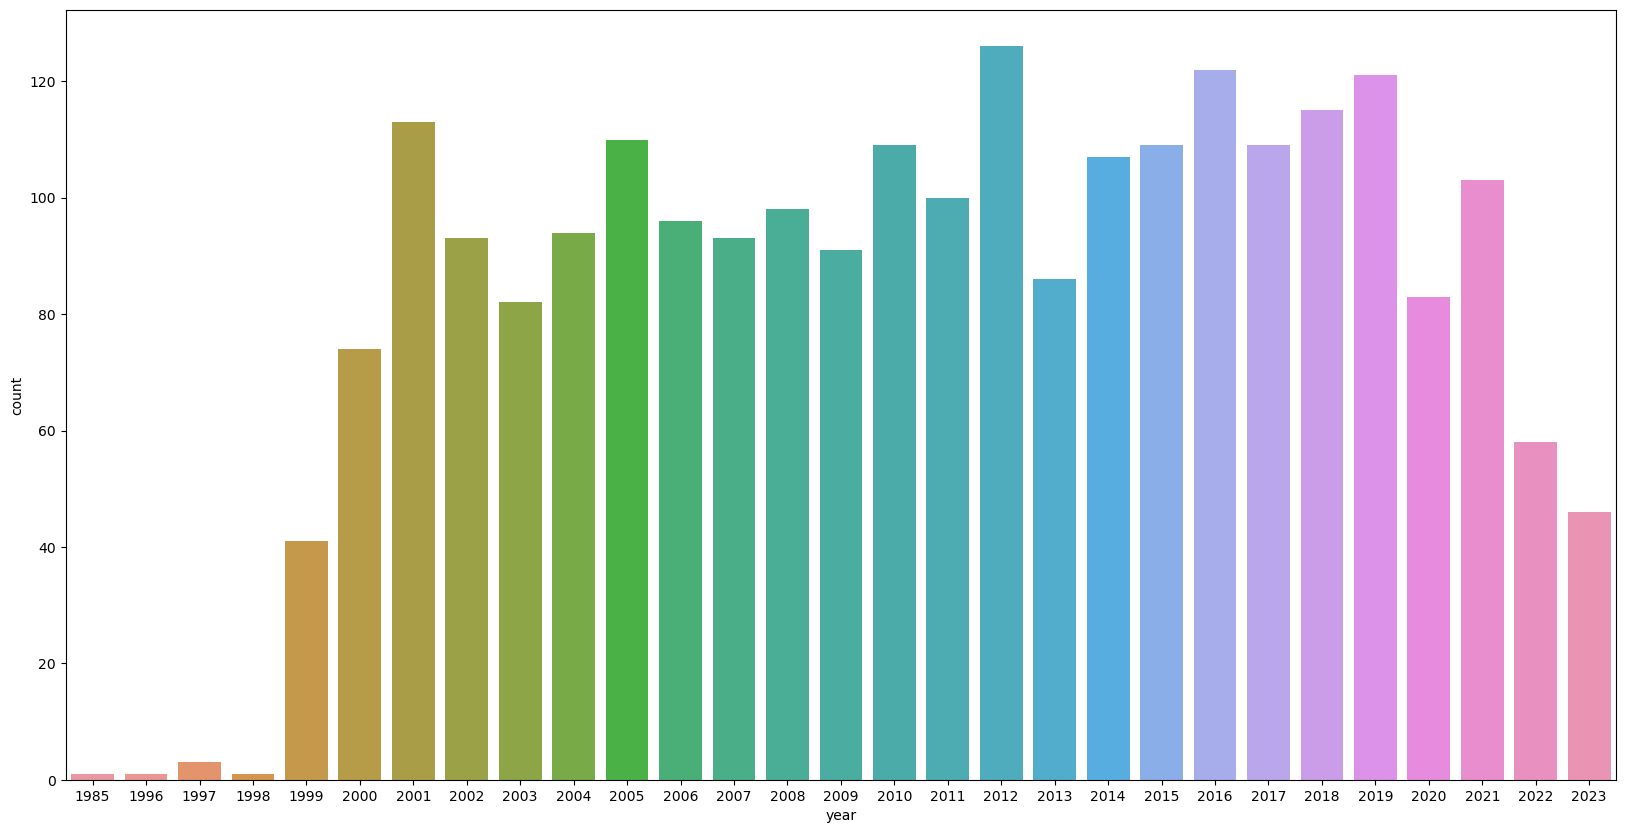

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['year'])

(array([  1.,   0.,   1., 119., 288., 393., 398., 428., 467., 290.]),
 array([1985. , 1988.8, 1992.6, 1996.4, 2000.2, 2004. , 2007.8, 2011.6,
        2015.4, 2019.2, 2023. ]),
 <BarContainer object of 10 artists>)

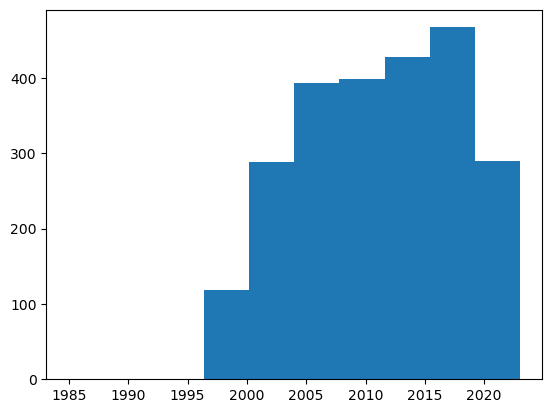

In [12]:
plt.hist(data['year'],bins=10)

In [13]:
x=data[data['artist']=='Rihanna']
x['popularity'].sum()

2318

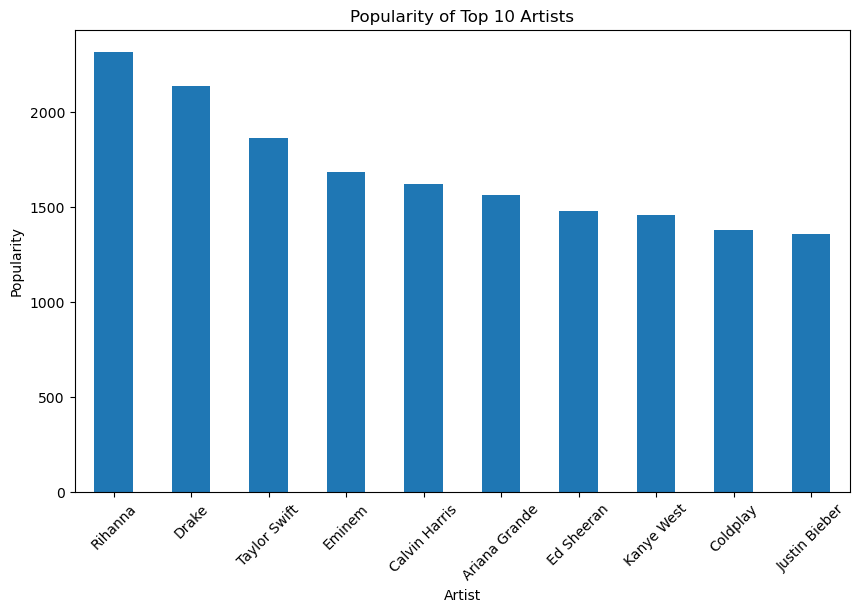

In [14]:
artist_popularity = data.groupby('artist')['popularity'].sum()
top_10_artists = artist_popularity.nlargest(10)
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Popularity of Top 10 Artists')
plt.xticks(rotation=45)
plt.show()

# Number of Songs by top 10 Artists

In [15]:
artist_song_count = data[data['artist'].isin(top_10_artists.index)].groupby('artist')['title'].count()
artist_song_count

artist
Ariana Grande    20
Calvin Harris    22
Coldplay         17
Drake            28
Ed Sheeran       19
Eminem           22
Justin Bieber    18
Kanye West       19
Rihanna          30
Taylor Swift     23
Name: title, dtype: int64

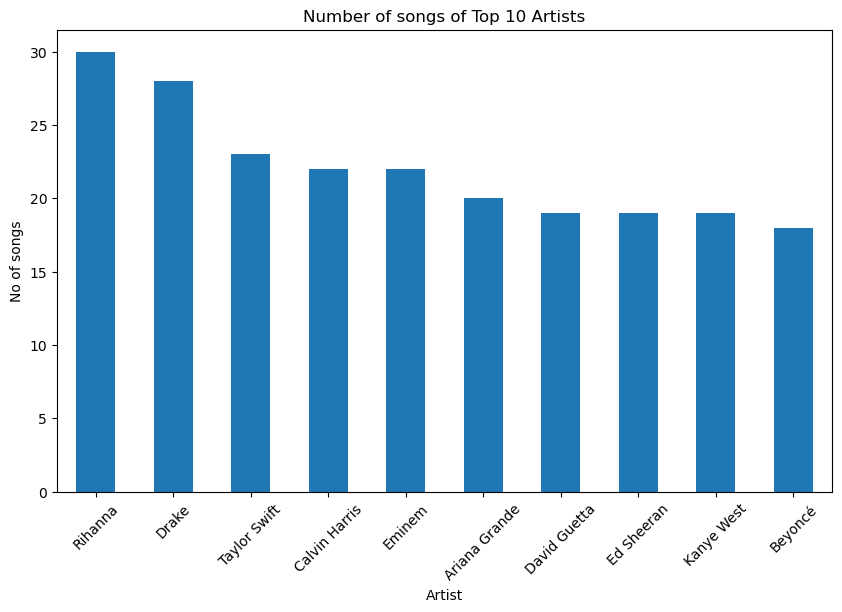

In [16]:
artist_songs = data.groupby('artist')['title'].count()
top_10_artists = artist_songs.nlargest(10)
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('No of songs')
plt.title('Number of songs of Top 10 Artists')
plt.xticks(rotation=45)
plt.show()

# Avg. Popularity of Songs Each Year.

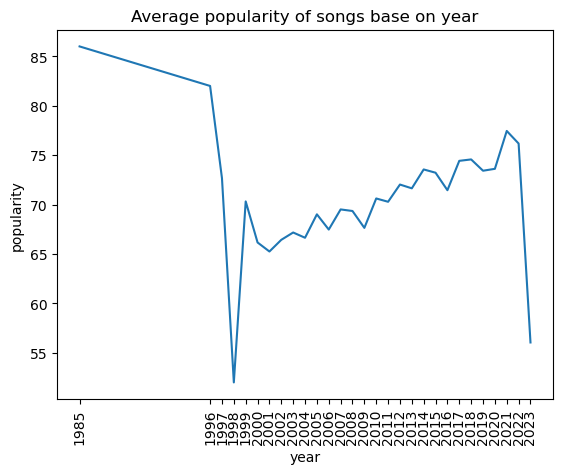

In [17]:
tmp_df = data.groupby('year')['popularity'].mean().reset_index()
plt.title('Average popularity of songs base on year')
sns.lineplot(data=tmp_df, x='year', y='popularity')
plt.xticks(tmp_df['year'],rotation=90)
plt.show()

# Most Trending Genre from last 20 years.

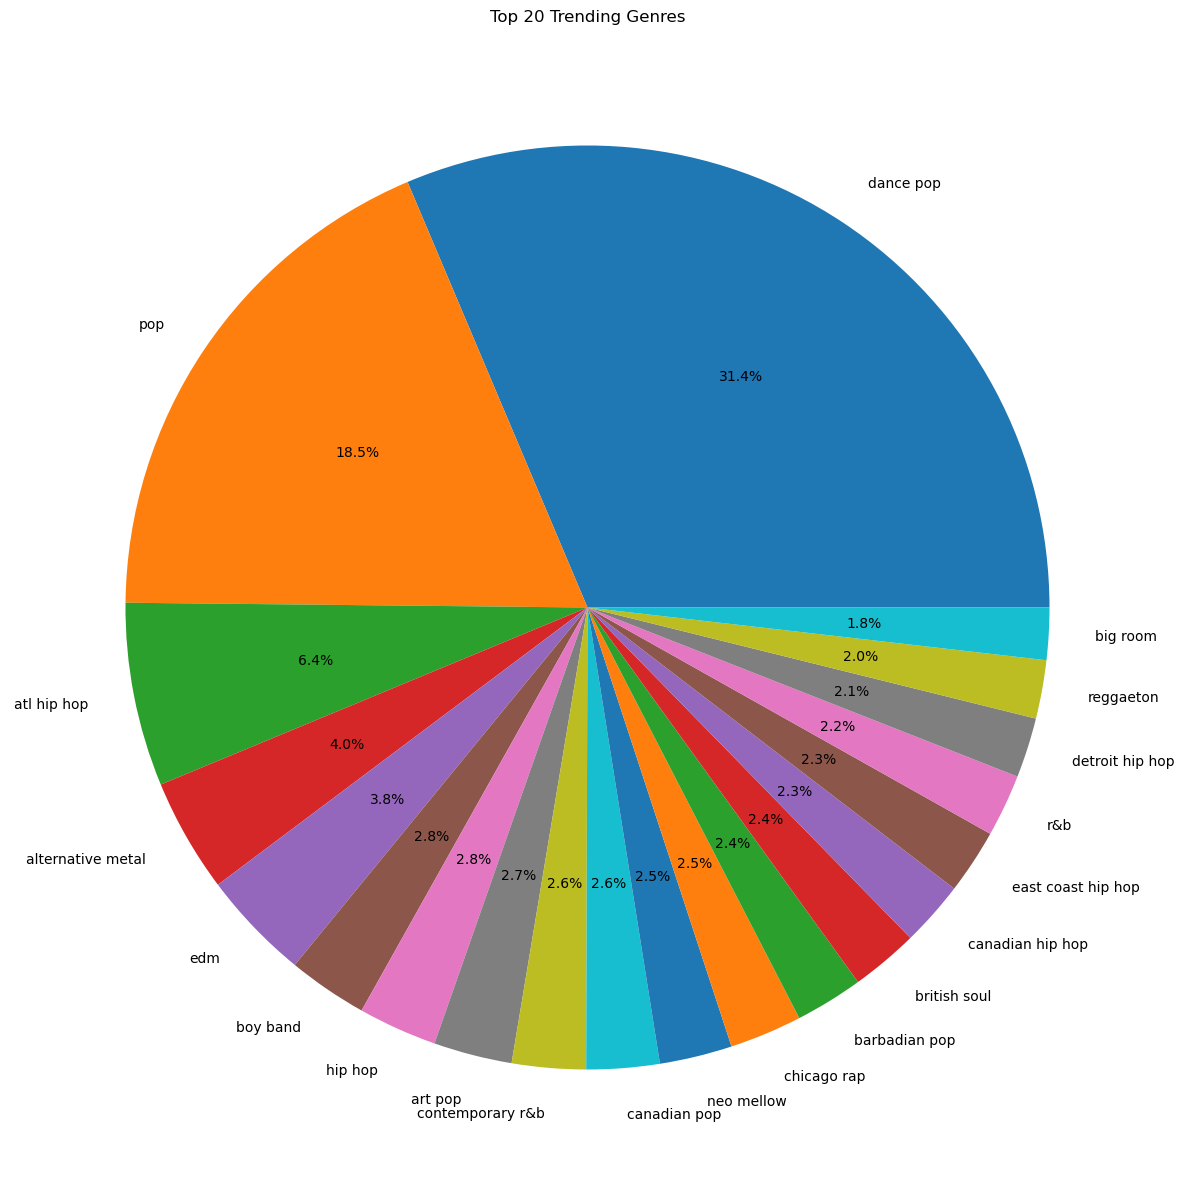

In [23]:
genre_popularity=data.groupby('top genre')['popularity'].sum()
top_20_genres = genre_popularity.nlargest(20)
plt.figure(figsize=(15,15))
plt.pie(top_20_genres, labels=top_20_genres.index, autopct='%1.1f%%')
plt.title('Top 20 Trending Genres')
plt.show()

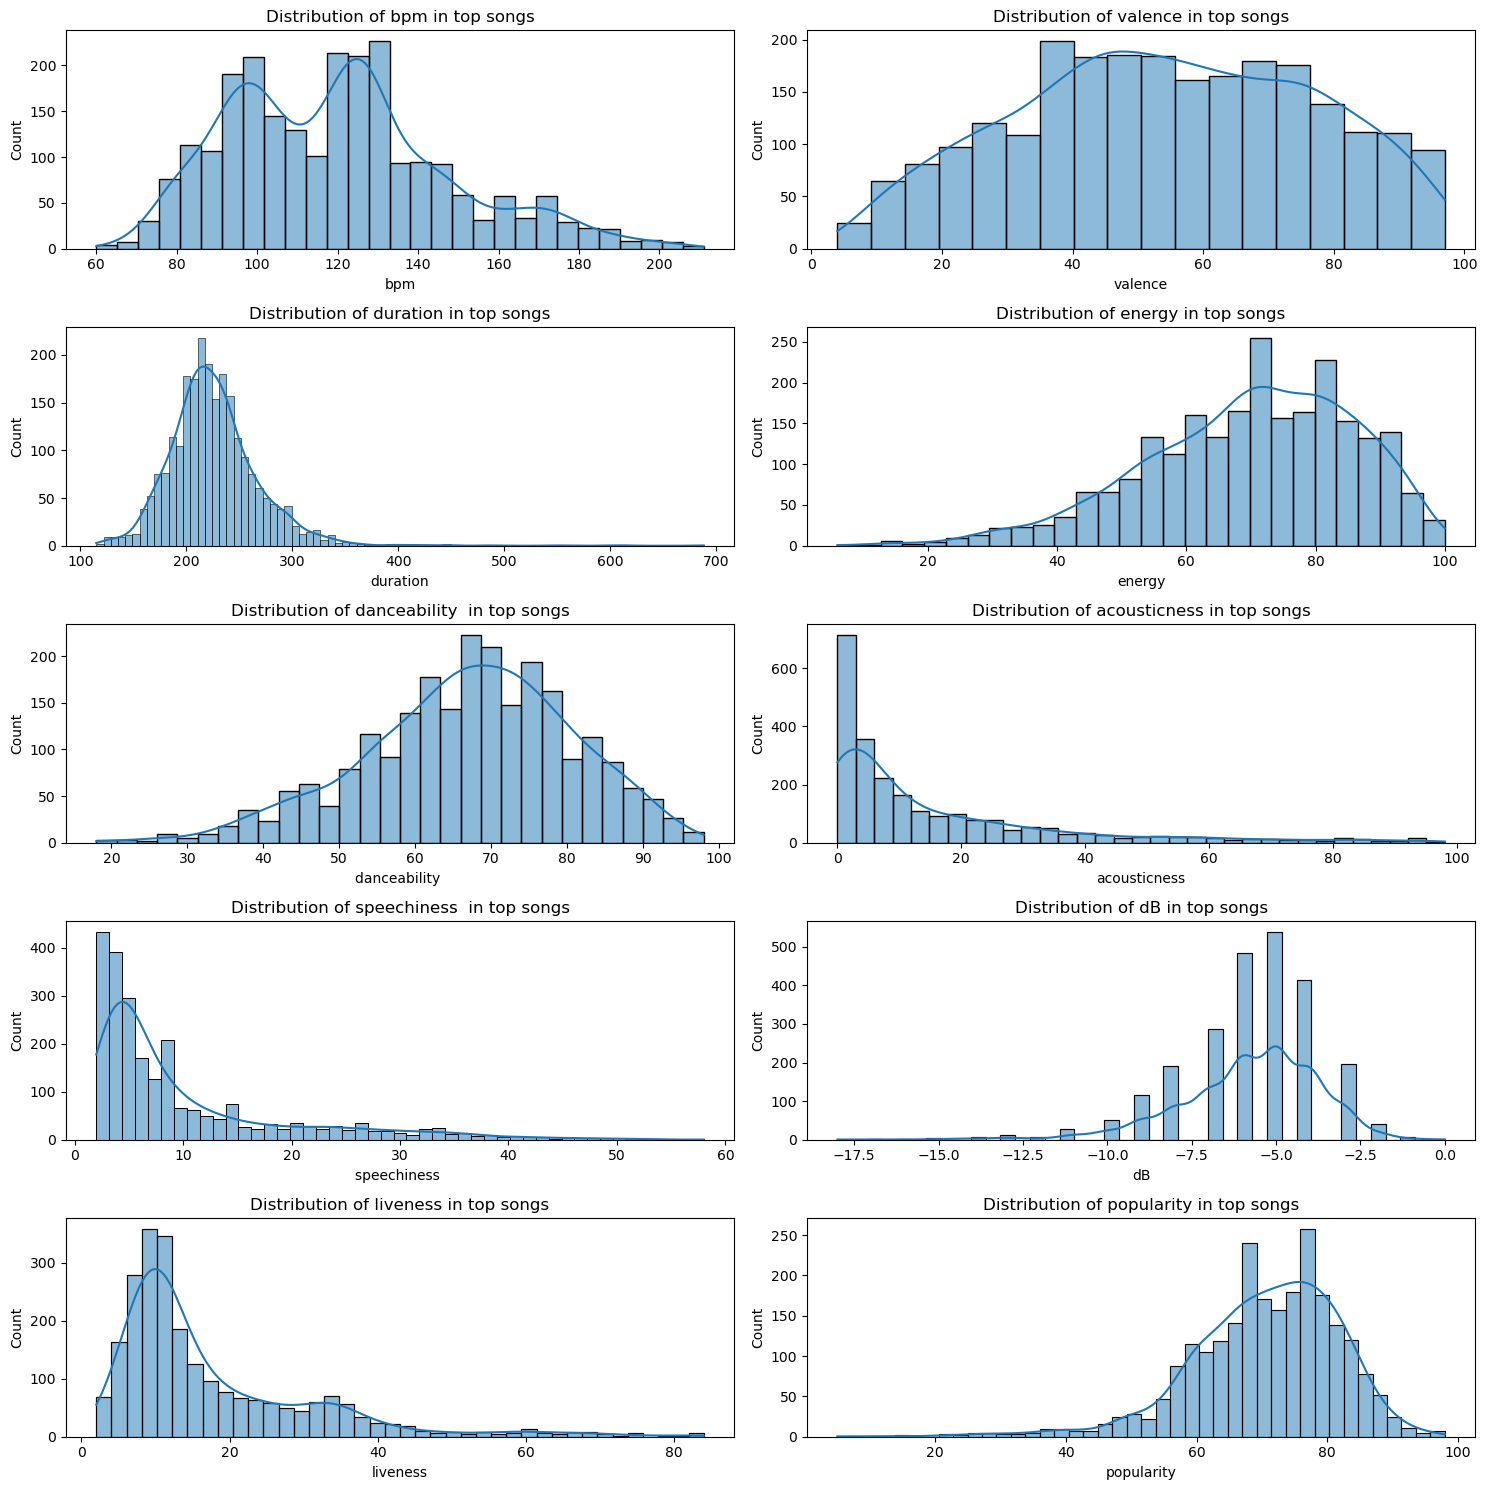

In [20]:
tmp_cols =  ['bpm', 'energy', 'danceability ', 'dB', 'liveness', 
             'valence', 'duration', 'acousticness', 'speechiness ', 'popularity']
fig, axes = plt.subplots(5, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
for count, col in enumerate(tmp_cols):
    sns.histplot(data[col], kde=True, ax=axes[count%5][count % 2])
    axes[count%5][count % 2].title.set_text(f'Distribution of {col} in top songs')
    
plt.tight_layout()
plt.show()